In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read the text document 
with open('/Users/mac/Desktop/projects/datasets/whatsapp_analytics/_chat.txt', 'r') as file:
    data = file.readlines()

In [3]:
# remove the first two messages 
data[2:]

['[15/03/2016, 13:23:53] Fit Trackers🏃\u200d♀️🏃\u200d♂️🏋️\u200d♀️🏋️\u200d♂️⛹️\u200d♀️⛹️\u200d♂️🚴\u200d♀️🚴\u200d♂️: \u200eYou were added\n',
 '[24/06/2024, 16:05:27] ~\u202fchuktu: Happy Belated Birthday @2348113547898\n',
 '\u200e[24/06/2024, 16:05:27] ~\u202fchuktu: \u200eimage omitted\n',
 '[24/06/2024, 16:08:31] ~\u202fLarry: \u200eWaiting for this message. This may take a while.\n',
 '[24/06/2024, 16:08:45] ~\u202fLarry: \u200eWaiting for this message. This may take a while.\n',
 '[24/06/2024, 16:09:06] ~\u202fLarry: \u200eWaiting for this message. This may take a while.\n',
 '[24/06/2024, 16:10:15] ~\u202fLarry: \u200eWaiting for this message. This may take a while.\n',
 '[24/06/2024, 16:10:18] ~\u202fAkpojotor Mudiaga Stephen: \u200eWaiting for this message. This may take a while.\n',
 '[24/06/2024, 16:10:38] ~\u202fLarry: \u200eWaiting for this message. This may take a while.\n',
 '[24/06/2024, 16:11:14] ~\u202fLarry: \u200eWaiting for this message. This may take a while.\n',
 '

In [4]:
import re 
def strip_leading_and_newline(text):
    stripped_text =  re.sub(r'^\s+|\s+$', '', text)
    stripped_text = stripped_text.strip()
    return stripped_text

# Test the function with some example inputs
data = [strip_leading_and_newline(text) for text in data]
data[2:]

['[15/03/2016, 13:23:53] Fit Trackers🏃\u200d♀️🏃\u200d♂️🏋️\u200d♀️🏋️\u200d♂️⛹️\u200d♀️⛹️\u200d♂️🚴\u200d♀️🚴\u200d♂️: \u200eYou were added',
 '[24/06/2024, 16:05:27] ~\u202fchuktu: Happy Belated Birthday @2348113547898',
 '\u200e[24/06/2024, 16:05:27] ~\u202fchuktu: \u200eimage omitted',
 '[24/06/2024, 16:08:31] ~\u202fLarry: \u200eWaiting for this message. This may take a while.',
 '[24/06/2024, 16:08:45] ~\u202fLarry: \u200eWaiting for this message. This may take a while.',
 '[24/06/2024, 16:09:06] ~\u202fLarry: \u200eWaiting for this message. This may take a while.',
 '[24/06/2024, 16:10:15] ~\u202fLarry: \u200eWaiting for this message. This may take a while.',
 '[24/06/2024, 16:10:18] ~\u202fAkpojotor Mudiaga Stephen: \u200eWaiting for this message. This may take a while.',
 '[24/06/2024, 16:10:38] ~\u202fLarry: \u200eWaiting for this message. This may take a while.',
 '[24/06/2024, 16:11:14] ~\u202fLarry: \u200eWaiting for this message. This may take a while.',
 '[24/06/2024, 16:11:3

In [5]:

# create list of list strucures that removes frst two meesgaes 
data = data[2:]
cleaned_data = []
for line in data:
    # Extract everything between the square brackets, which includes date and time
    datetime_str = line.split("]")[0][1:]  # Removes the opening '['
    
    # Separate date and time
    # date_part, time_part = datetime_str.split(", ")
    if ", " in datetime_str:
        parts = datetime_str.split(", ")
        if len(parts) >= 2:
                date_part = parts[0]
                time_part = parts[1]  # Join remaining parts if there are more than one
        else:
                print("Skipping line due to unexpected format:", line)
                continue
    
    # Extract member and message
    line_remainder = line[len(datetime_str) + 2:]  # Skip past "] " to get the rest of the line
    member = line_remainder.split(":")[0].strip()  # Member is before the first ":"
    if member.startswith("~"):
          member = member[1:].strip()

    messages = line_remainder[len(member)+1:].strip()
    colon_index = messages.find(":")
    if colon_index >= -1:
        message = messages[colon_index+1:].strip()
    # print(time_part)
   
    cleaned_data.append([date_part, time_part, member, message])

    # print(f"Date: {date_part}, Time: {time_part}, Member: {member}, Message: {message}")

In [6]:
cleaned_data[0:10]

[['15/03/2016',
  '13:23:53',
  'Fit Trackers🏃\u200d♀️🏃\u200d♂️🏋️\u200d♀️🏋️\u200d♂️⛹️\u200d♀️⛹️\u200d♂️🚴\u200d♀️🚴\u200d♂️',
  '\u200eYou were added'],
 ['24/06/2024', '16:05:27', 'chuktu', 'Happy Belated Birthday @2348113547898'],
 ['[24/06/2024', '16:05:27', 'chuktu', '\u200eimage omitted'],
 ['24/06/2024',
  '16:08:31',
  'Larry',
  '\u200eWaiting for this message. This may take a while.'],
 ['24/06/2024',
  '16:08:45',
  'Larry',
  '\u200eWaiting for this message. This may take a while.'],
 ['24/06/2024',
  '16:09:06',
  'Larry',
  '\u200eWaiting for this message. This may take a while.'],
 ['24/06/2024',
  '16:10:15',
  'Larry',
  '\u200eWaiting for this message. This may take a while.'],
 ['24/06/2024',
  '16:10:18',
  'Akpojotor Mudiaga Stephen',
  '\u200eWaiting for this message. This may take a while.'],
 ['24/06/2024',
  '16:10:38',
  'Larry',
  '\u200eWaiting for this message. This may take a while.'],
 ['24/06/2024',
  '16:11:14',
  'Larry',
  '\u200eWaiting for this message

In [7]:
df = pd.DataFrame(cleaned_data, columns=["date", "time", "member", "message"])
df.head(20)

,date,time,member,message
0,15/03/2016,13:23:53,Fit Trackers🏃‍♀️🏃‍♂️🏋️‍♀️🏋️‍♂️⛹️‍♀️⛹️‍♂️🚴‍♀️🚴‍♂️,‎You were added
1,24/06/2024,16:05:27,chuktu,Happy Belated Birthday @2348113547898
2,[24/06/2024,16:05:27,chuktu,‎image omitted
3,24/06/2024,16:08:31,Larry,‎Waiting for this message. This may take a while.
4,24/06/2024,16:08:45,Larry,‎Waiting for this message. This may take a while.
5,24/06/2024,16:09:06,Larry,‎Waiting for this message. This may take a while.
6,24/06/2024,16:10:15,Larry,‎Waiting for this message. This may take a while.
7,24/06/2024,16:10:18,Akpojotor Mudiaga Stephen,‎Waiting for this message. This may take a while.
8,24/06/2024,16:10:38,Larry,‎Waiting for this message. This may take a while.
9,24/06/2024,16:11:14,Larry,‎Waiting for this message. This may take a while.


In [8]:
# remove rows without valid date 
pattern =  r"^(?:[0-9]{2}/[0-9]{2}/[0-9]{4})$"
def is_valid(date):
    date = date.strip('[')
    valid_date = re.match(pattern, date)
    return valid_date.group() if valid_date else None

# check if date is valid, if noalid drop 
# df['date'] = df['date'].str.replace(r'[\[\]]', '', regex=True)
df['date'] = df['date'].apply(is_valid)

In [9]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.time
df.tail(20)

,date,time,member,message
17466,04/02/2025,17:32:49,Samjoe(Split),Wow...our run will be uploaded on Mylaps.com l...
17467,04/02/2025,17:33:49,Modesther,E dey dey before na
17468,04/02/2025,17:33:49,,
17469,04/02/2025,17:34:27,Oluwatobiloba Adeshina,Shey queue plenty for there for those who went...
17470,04/02/2025,17:34:39,Samjoe(Split),They are really desperate for platinum label.😂...
17471,04/02/2025,17:34:43,Salted,"Me slf suppose run with purpose 😂 noted boss,,..."
17472,04/02/2025,17:35:27,Samjoe(Split),Them never upload am before...
17473,04/02/2025,17:36:23,Waziri Mainasara Abubakar,No bro
17474,04/02/2025,17:36:23,,
17475,04/02/2025,17:36:23,,


In [10]:
df['time'].dtypes

dtype('O')

In [11]:
# remove rows without valid time
# time_pattern = r"^\s*(([0-1]?[0-9]|2[0-3]):([0-5]?[0-9])\s*(?:AM|PM)?|[0-9]:[0-5][0-9])\s*$"

# def is_valid_time(time):
#   match = re.match(time_pattern, time)
#   return match.group(1).strip() if match else None

# # check if ttdime is valid, if  valid drop 
# df['time'] = df['time'].apply(is_valid_time)
# df.tail(20)

In [12]:
# find number of new members
new_members = 0
for index, row in df.iterrows():
    if 'added' in row['message'] or 'joined' in row['message'] or 'invited' in row['message'] or 'joined using' in row['message']:
        new_members += 1
print(f"Number of people who joined the group: {new_members}")

Number of people who joined the group: 54


In [13]:
# # create a dataframe for new members
# # Filter rows containing the keywords (added, joined, invited, etc.)
new_members_df = df[df['message'].str.contains('added|joined|invited|joined using', case=False, na=False)][['date', 'message', 'member']]


def extract_message(message):
    pattern = r'[A-Za-z\s\W]+ added\s?~?\s?[A-Za-z\s\W]+'
    if re.match(pattern, message):
        return message
    return None
    
new_members_df['valid_message'] = new_members_df['message'].apply(extract_message)
new_members_df = new_members_df[new_members_df['valid_message'].notna()]
new_members_df = new_members_df[['date', 'valid_message', 'member']]
new_members_df


,date,valid_message,member
1625,30/07/2024,‎~ Arewa Mafia 🦅 added ~ Cynthia,Cynthia
3923,14/08/2024,‎~ Arewa Mafia 🦅 added Joy Sweet Thighs,Joy Sweet Thighs
4172,15/08/2024,Who added @2348147622276 here?..,Arewa Mafia 🦅
4415,17/08/2024,‎~ Arewa Mafia 🦅 added ~ The Eddie,The Eddie
4635,18/08/2024,‎~ Arewa Mafia 🦅 added ~ Chukky,Chukky
5491,22/08/2024,‎~ Adebukolami ❣️ added ~ Oluwatosin Faith | O...,Oluwatosin Faith | Ogungbaye
5616,25/08/2024,‎~ Arewa Mafia 🦅 added ~ GeorgieTek,GeorgieTek
5671,25/08/2024,‎~ Arewa Mafia 🦅 added ~ Kate,Kate
6143,03/09/2024,‎~ Arewa Mafia 🦅 added ~ Shiloh George (SG),Shiloh George (SG)
6144,03/09/2024,‎~ Arewa Mafia 🦅 added ~ Flourish (H.D)🌹🌻,Flourish (H.D)🌹🌻


In [14]:
new_members_df

,date,valid_message,member
1625,30/07/2024,‎~ Arewa Mafia 🦅 added ~ Cynthia,Cynthia
3923,14/08/2024,‎~ Arewa Mafia 🦅 added Joy Sweet Thighs,Joy Sweet Thighs
4172,15/08/2024,Who added @2348147622276 here?..,Arewa Mafia 🦅
4415,17/08/2024,‎~ Arewa Mafia 🦅 added ~ The Eddie,The Eddie
4635,18/08/2024,‎~ Arewa Mafia 🦅 added ~ Chukky,Chukky
5491,22/08/2024,‎~ Adebukolami ❣️ added ~ Oluwatosin Faith | O...,Oluwatosin Faith | Ogungbaye
5616,25/08/2024,‎~ Arewa Mafia 🦅 added ~ GeorgieTek,GeorgieTek
5671,25/08/2024,‎~ Arewa Mafia 🦅 added ~ Kate,Kate
6143,03/09/2024,‎~ Arewa Mafia 🦅 added ~ Shiloh George (SG),Shiloh George (SG)
6144,03/09/2024,‎~ Arewa Mafia 🦅 added ~ Flourish (H.D)🌹🌻,Flourish (H.D)🌹🌻


In [15]:
int(len(new_members_df['valid_message']))

49

In [16]:
exited_members = df[df['message'].str.contains('left', case=False, na=False)][['date', 'message', 'member']]

def get_exited_members(exited_members, message, member):
    exited_members['extracted_name'] = exited_members[message].str.extract(r'(\w+)\s+left')
    exited_members['left_group'] = exited_members['extracted_name'].str.strip().isin(exited_members[member].str.strip())
    exited_members = exited_members[exited_members['left_group']]
    exited_members.reset_index(drop=True, inplace=True)
    return exited_members

left_members = get_exited_members(exited_members, 'message', 'member')
left_members
    


,date,message,member,extracted_name,left_group


In [17]:
int(len(left_members['left_group']))

0

In [18]:
new_members_df['date'].dtypes

dtype('O')

In [19]:
def week_on_week(x, date, value):
    x[date] = pd.to_datetime(x[date], dayfirst=True)
    print(x[date].dtypes)
    x['week_number'] = x[date].dt.isocalendar().week
    # Group the data by week and calculate the sum of the value column
    x_weekly= x.groupby('week_number')[value].count().reset_index()
    # Calculate the percentage change week-on-week
    x_weekly['week_over_week_change'] = ((x_weekly[value] - x_weekly[value].shift(1)) / x_weekly[value].shift(1)) * 100

    return x_weekly

result_df = week_on_week(new_members_df, 'date', 'valid_message')
print(result_df)



datetime64[ns]
    week_number  valid_message  week_over_week_change
0             1              2                    NaN
1             3              3              50.000000
2             4              4              33.333333
3             5              3             -25.000000
4            31              1             -66.666667
5            33              4             300.000000
6            34              3             -25.000000
7            36              4              33.333333
8            38              1             -75.000000
9            39              5             400.000000
10           41              1             -80.000000
11           43              2             100.000000
12           44              5             150.000000
13           46              1             -80.000000
14           47              4             300.000000
15           48              2             -50.000000
16           49              1             -50.000000
17           

In [20]:
df.head(20)

,date,time,member,message
0,15/03/2016,13:23:53,Fit Trackers🏃‍♀️🏃‍♂️🏋️‍♀️🏋️‍♂️⛹️‍♀️⛹️‍♂️🚴‍♀️🚴‍♂️,‎You were added
1,24/06/2024,16:05:27,chuktu,Happy Belated Birthday @2348113547898
2,24/06/2024,16:05:27,chuktu,‎image omitted
3,24/06/2024,16:08:31,Larry,‎Waiting for this message. This may take a while.
4,24/06/2024,16:08:45,Larry,‎Waiting for this message. This may take a while.
5,24/06/2024,16:09:06,Larry,‎Waiting for this message. This may take a while.
6,24/06/2024,16:10:15,Larry,‎Waiting for this message. This may take a while.
7,24/06/2024,16:10:18,Akpojotor Mudiaga Stephen,‎Waiting for this message. This may take a while.
8,24/06/2024,16:10:38,Larry,‎Waiting for this message. This may take a while.
9,24/06/2024,16:11:14,Larry,‎Waiting for this message. This may take a while.


In [21]:
dy = df.copy(deep=True)

In [22]:
for index, row in df.iterrows():
  if "You're now an admin" in row['member'] or "left" in row['member'] or "added" in row['member'] or "removed" in row['member'] or "changed" in row['member'] or "created" in row['member'] or "changed" in row['member'] or "removed" in row['member']:
    df.drop(index, inplace=True)

In [23]:
df['member']

0        Fit Trackers🏃‍♀️🏃‍♂️🏋️‍♀️🏋️‍♂️⛹️‍♀️⛹️‍♂️🚴‍♀️🚴‍♂️
1                                                  chuktu
2                                                  chuktu
3                                                   Larry
4                                                   Larry
                               ...                       
17481                           Waziri Mainasara Abubakar
17482                                                    
17483                                                    
17484                              Oluwatobiloba Adeshina
17485                              Oluwatobiloba Adeshina
Name: member, Length: 17486, dtype: object

In [24]:
df['time']

0        13:23:53
1        16:05:27
2        16:05:27
3        16:08:31
4        16:08:45
           ...   
17481    17:37:49
17482    17:37:49
17483    17:37:49
17484    17:38:30
17485    17:38:53
Name: time, Length: 17486, dtype: object

In [30]:
df.head()

,date,time,member,message
0,03/15/2016,13:23:53,Fit Trackers🏃‍♀️🏃‍♂️🏋️‍♀️🏋️‍♂️⛹️‍♀️⛹️‍♂️🚴‍♀️🚴‍♂️,‎You were added
1,06/24/2024,16:05:27,chuktu,Happy Belated Birthday @2348113547898
2,06/24/2024,16:05:27,chuktu,‎image omitted
3,06/24/2024,16:08:31,Larry,‎Waiting for this message. This may take a while.
4,06/24/2024,16:08:45,Larry,‎Waiting for this message. This may take a while.


In [25]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['date'] = df['date'].dt.strftime('%m/%d/%Y')
df.drop(columns=['extracted_name', 'left_group'], inplace=True)

KeyError: "['extracted_name', 'left_group'] not found in axis"

In [ ]:
df.head(10)

,date,time,member,message
0,03/15/2016,13:23:54,Fit Trackers🏃‍♀️🏃‍♂️🏋️‍♀️🏋️‍♂️⛹️‍♀️⛹️‍♂️🚴‍♀️🚴‍♂️,‎You were added
1,06/24/2024,16:05:28,chuktu,Happy Belated Birthday @2348113547898
2,06/24/2024,16:05:28,chuktu,‎image omitted
3,06/24/2024,16:08:32,Larry,‎Waiting for this message. This may take a while.
4,06/24/2024,16:08:46,Larry,‎Waiting for this message. This may take a while.
5,06/24/2024,16:09:07,Larry,‎Waiting for this message. This may take a while.
6,06/24/2024,16:10:16,Larry,‎Waiting for this message. This may take a while.
7,06/24/2024,16:10:19,Akpojotor Mudiaga Stephen,‎Waiting for this message. This may take a while.
8,06/24/2024,16:10:39,Larry,‎Waiting for this message. This may take a while.
9,06/24/2024,16:11:15,Larry,‎Waiting for this message. This may take a while.


In [ ]:
df.dropna(inplace=True)
len(df)

8195

In [ ]:
# df.to_csv('cleaned_fit.csv', index=False)

##  Next Steps

 - What metrics are we measuring?
    - Number of community members.  - DONE
    - Number of new members. - DONE
    - Plot showing the number of messages by  day/week/month.
    - Plot showing number of messages by community mmebers.- DONE
    - Measure engagment using heatmap to show frequency of messages by day of the week and number of messages. - DONE
    - Retnetion rate (What is the formula for rentention rate)


<!-- Completed -->
- Create new columns
    - Create a day, month, day of the week, hour columns. 
    

In [ ]:
df['time'].dtypes

dtype('O')

In [ ]:
df['date'].dtypes

dtype('O')

In [ ]:
df['date'] = pd.to_datetime(df['date'])
# df['date'] = df['date'].dt.strftime('%m/%d/%Y')
df['day'] = df['date'].dt.day_name()

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month_number'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()

In [ ]:
df.head()

,date,time,member,message,day,month_number,month_name
0,2016-03-15,13:23:54,Fit Trackers🏃‍♀️🏃‍♂️🏋️‍♀️🏋️‍♂️⛹️‍♀️⛹️‍♂️🚴‍♀️🚴‍♂️,‎You were added,Tuesday,3,March
1,2024-06-24,16:05:28,chuktu,Happy Belated Birthday @2348113547898,Monday,6,June
2,2024-06-24,16:05:28,chuktu,‎image omitted,Monday,6,June
3,2024-06-24,16:08:32,Larry,‎Waiting for this message. This may take a while.,Monday,6,June
4,2024-06-24,16:08:46,Larry,‎Waiting for this message. This may take a while.,Monday,6,June


In [29]:
df['time'].dtypes

dtype('O')

In [28]:
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour

TypeError: <class 'datetime.time'> is not convertible to datetime, at position 0

In [ ]:
df['time'] = df['time'].dt.strftime("%H:%M")

In [ ]:
df.head()

,date,time,member,message,day,month_number,month_name,hour


### Number of community members

In [ ]:
'''
Remove the community manager name. 
chnage users name to user.name_1= "User_1"
What is the average number of messages sent per day?

'''

# df = df[df['member'] != 'Augusta Nadia']
# df['member'].unique()


member_map = {}
unique_id = 1
for member in df['member'].unique():
    member_map[member] = f'Member{unique_id}'
    unique_id += 1

# # Anonymize the member name column
df['users'] = df['member'].map(member_map)



In [ ]:
df.drop(['member'], axis=1, inplace=True)

In [ ]:
# number of community members

users = df['users'].nunique()
print(users)

0


In [ ]:

import matplotlib as plt
import seaborn as sns

# top 10 most active members of the community

df['users'].value_counts().head(10)
# plt.figure(figsize=(8))

Series([], Name: count, dtype: int64)

In [ ]:
# most active by day of the weekactive_day

active_days = df['day'].value_counts()
print(active_days)

print('--------------------')

active_hour = df['hour'].value_counts()
print(active_hour)

#number of unique users who sent a message on each day of the week  
# df.groupby('day')['member'].nunique()
'''
The data set contains daily records of user activity    
The data set contains daily records of user activity    
The data set contains daily records of user activity from a social media platform. Each row represents one user's activity on a given day. The data set contains the following columns:
from social media platform, including 'member', 'date', 'time', 'message', 'day', 'month_number', 'month_name', and 'hour'.
- 'date' is in format "YY
- 'date' is in format "YY
- 'date' is in format "YY
'''

Series([], Name: count, dtype: int64)
--------------------
Series([], Name: count, dtype: int64)


'\nThe data set contains daily records of user activity    \nThe data set contains daily records of user activity    \nThe data set contains daily records of user activity from a social media platform. Each row represents one user\'s activity on a given day. The data set contains the following columns:\nfrom social media platform, including \'member\', \'date\', \'time\', \'message\', \'day\', \'month_number\', \'month_name\', and \'hour\'.\n- \'date\' is in format "YY\n- \'date\' is in format "YY\n- \'date\' is in format "YY\n'

In [ ]:
df.columns

Index(['date', 'time', 'message', 'day', 'month_number', 'month_name', 'hour',
       'users'],
      dtype='object')

In [ ]:
df['hour'].unique()

array([], dtype=int32)

In [ ]:
#groupby the day of the week and count the number of unique users who sent a message on each day of the week

# Group data by day and hour, calculate message count
message_counts = df.groupby(['day', 'hour'])['message'].count().unstack()
message_counts = message_counts.fillna(0)
message_counts = message_counts.astype(int)
print(message_counts)

Empty DataFrame
Columns: []
Index: []


ValueError: not enough values to unpack (expected 2, got 1)

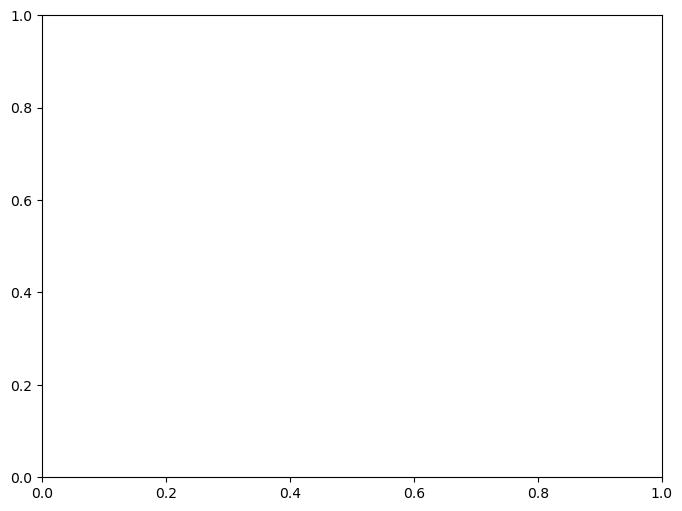

In [ ]:
import matplotlib.pyplot as plt


# extract data for heatmap
days = message_counts.index.to_list()
hours = message_counts.columns.to_list()
number_of_messages = message_counts.values.tolist()


# Create a heatmap
plt.figure(figsize=(8, 6))
plt.pcolor(number_of_messages, cmap='YlGnBu', vmin=0)

# Customize heatmap labels and title
plt.xticks(list(range(len(hours))), hours, rotation=45)  # Rotate x-axis labels for readability
plt.yticks(list(range(len(days))), days)
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Message Count Heatmap (Hourly by Day)')

# Add colorbar
plt.colorbar(label='Number of Messages')

# Display the heatmap
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['date', 'time', 'message', 'day', 'month_number', 'month_name', 'hour',
       'users'],
      dtype='object')

In [ ]:
df.head(10)

,date,time,message,day,month_number,month_name,hour,users
0,2023-02-24,10:37,I like d name already 🥰,Friday,2,February,10,Member1
11,2023-02-24,10:44,"Hi everyone, my name is Ese, I am a data analy...",Friday,2,February,10,Member1
13,2023-02-24,10:46,Nice to meet you Ese,Friday,2,February,10,Member2
14,2023-02-24,10:47,"Hello everyone, my name is Kemi, a Product des...",Friday,2,February,10,Member2
21,2023-02-24,10:49,Nice to meet you Kem,Friday,2,February,10,Member1
26,2023-02-24,10:57,No dey whyne naw😩😩,Friday,2,February,10,Member2
27,2023-02-24,10:58,"Hi 👋 my name is Tomiwa, I’m a BDR in tech sale",Friday,2,February,10,Member3
28,2023-02-24,10:58,Thank you,Friday,2,February,10,Member2
29,2023-02-24,10:58,I’m excited to meet you guy,Friday,2,February,10,Member3
30,2023-02-24,10:58,This looks really cool thoug,Friday,2,February,10,Member2


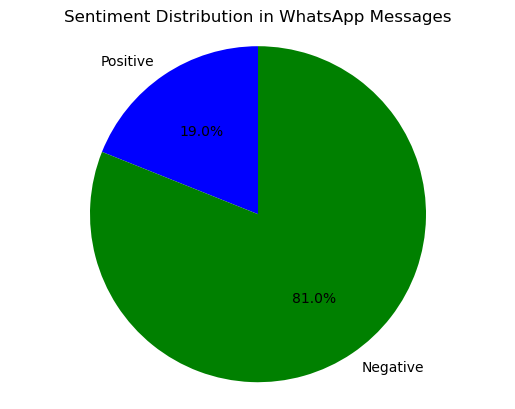

In [ ]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt


# Assuming 'message' is the column containing your WhatsApp messages
messages = df['message']

# Define a function to analyze sentiment (positive or negative)
def get_sentiment(text):
  # Create a TextBlob object from the text
  blob = TextBlob(text)
  # Check sentiment polarity (positive: > 0, negative: < 0)
  sentiment = 'Positive' if blob.sentiment.polarity > 0 else 'Negative'
  return sentiment

# Apply the sentiment function to each message and create a new column
df['sentiment'] = df['message'].apply(get_sentiment)

# Calculate positive and negative message counts
positive_count = len(df[df['sentiment'] == 'Positive'])
negative_count = len(df[df['sentiment'] == 'Negative'])

# Create a slide plot (pie chart)
labels = 'Positive', 'Negative'
sizes = [positive_count, negative_count]
colors = ['blue', 'green']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Sentiment Distribution in WhatsApp Messages')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

In [ ]:
df['date'].dtypes

dtype('<M8[ns]')

In [ ]:
df.to_csv('cleaned_data.csv', index=False)